In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from matplotlib_venn import venn3

In [2]:
input_path = '/Volumes/Behaviour/S1 2P Neural Tuning/99th Percentile Long/99maxisLong' 
output_path = '/Volumes/Behaviour/S1 2P Neural Tuning/99th Percentile Long/99maxisLong'
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']

In [ ]:
# Get ids of tuned neurons for each modality
session_names = []

for session in [sessions[11]]:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3][4:]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3][4:]+'_'+entries[4][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    maxima = pd.read_csv(os.path.join(input_path, session))
    maxima.set_index('trial', inplace=True)
    
    tuned_ids = pd.DataFrame()
    
    for s in stimuli:
        print(s)
        byStim = maxima.loc[maxima.index.str.contains(str(s))]
        tuned = byStim.replace(0, np.nan).dropna(how="all", axis=1).columns.tolist()
        tuned = pd.DataFrame(tuned, columns=[s])
        tuned_ids = pd.concat([tuned_ids, tuned], axis=1)
        stim_sum = np.array(byStim.sum(axis=0))
        np.save(os.path.join(output_path, ses_name+'_'+s), stim_sum)
        
    tuned_ids.to_csv(os.path.join(output_path, 'tuned_ids_'+ses_name+'_.csv'))
    



In [26]:
# Quantify fraction of responsive cells by modality
session_names = []
li = []

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3][4:]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3][4:]+'_'+entries[4][:5]
            
    #print(ses_name)
    session_names.append(ses_name)
    
    maxima = pd.read_csv(os.path.join(input_path, session))
    maxima.set_index('trial', inplace=True)
    cols = maxima.columns
    nb_cells = maxima.shape[1]
    maxima['sum']= maxima.sum(axis=1)
    maxima['== zero'] = maxima[cols].eq(0).sum(axis=1)
    maxima['nb_tuned']= nb_cells-maxima['== zero']
    maxima['ave_max']= maxima['sum']/maxima['nb_tuned']
    
    for s in stimuli:
        byStim = maxima.loc[maxima.index.str.contains(str(s))]
        mean_max = byStim['ave_max'].mean()
        stimAve = [s, ses_name, mean_max] 
        li.append(stimAve)
        
columns = ['modality', 'session', 'average maximum']
ave_maxima = pd.DataFrame(li, columns=columns)   
ave_maxima.to_csv(os.path.join(output_path, 'average_maxima_99_long.csv'))
ave_maxima.head()

,modality,session,average maximum
0,warm,2P05_Ses03,0.021785
1,hot,2P05_Ses03,0.018764
2,opto,2P05_Ses03,0.022202
3,off-target,2P05_Ses03,0.026126
4,von frey,2P05_Ses03,0.026239


In [28]:
health = ave_maxima.loc[ave_maxima['session'].str.contains('Ses')]
cfa = ave_maxima.loc[ave_maxima['session'].str.contains('CFA')]


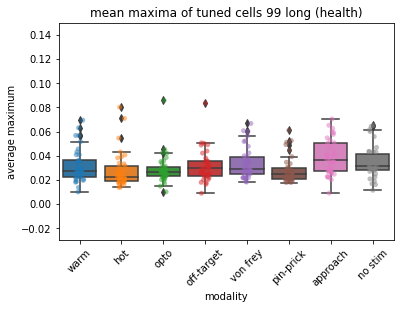

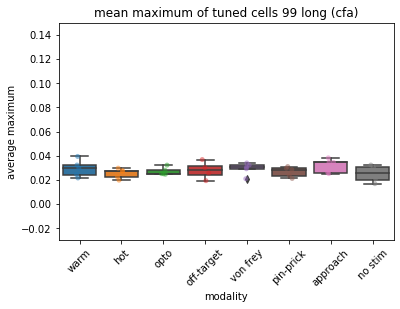

In [30]:
ax = sns.stripplot(x='modality', y='average maximum', alpha=0.5, data=health)
ax = sns.boxplot(x='modality', y='average maximum', data=health)
plt.xticks(rotation=45)
plt.ylim(-0.03,0.15)
plt.title('mean maxima of tuned cells 99 long (health)')
plt.savefig(os.path.join(output_path, 'health mean max tuned cells 99 long.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x='modality', y='average maximum', alpha=0.5, data=cfa)
ax = sns.boxplot(x='modality', y='average maximum', data=cfa)
plt.xticks(rotation=45)
plt.ylim(-0.03,0.15)
plt.title('mean maximum of tuned cells 99 long (cfa)')
plt.savefig(os.path.join(output_path, 'cfa mean max tuned cells 99 long.png'), bbox_inches='tight')
plt.show()

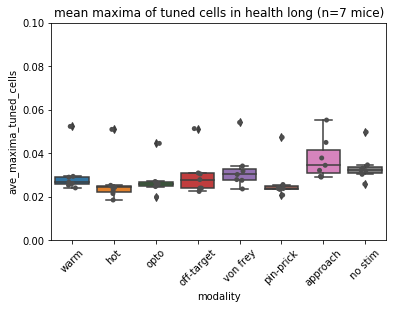

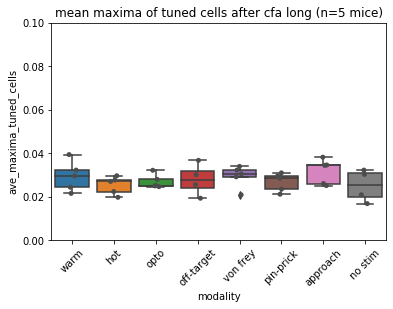

,mouse,modality,ave_maxima_tuned_cells
0,2P07,warm,0.039386
1,2P07,hot,0.019737
2,2P07,opto,0.025131
3,2P07,off-target,NaN
4,2P07,von frey,0.029160


In [33]:
stats_health = []
cols = ['mouse', 'modality', 'ave_maxima_tuned_cells']
mice = ['2P05', '2P06', '2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        ave = by_mouse[by_mouse['modality']==s]['average maximum'].mean()
        stats = [m, s,ave]
        stats_health.append(stats)
    
stats_health = pd.DataFrame(stats_health, columns = cols)
stats_health.to_csv(os.path.join(output_path, 'maxi stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='ave_maxima_tuned_cells',color='.3', data=stats_health)
ax = sns.boxplot(x='modality', y='ave_maxima_tuned_cells', data=stats_health)
plt.xticks(rotation=45)
plt.ylim(0, 0.1)
plt.title('mean maxima of tuned cells in health long (n=7 mice)')
plt.savefig(os.path.join(output_path, 'health mean max tuned cells 99 long (mouse ave).png'), bbox_inches='tight')
plt.show()

stats_cfa = []
cols = ['mouse', 'modality', 'ave_maxima_tuned_cells']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = cfa[cfa['session'].str.contains(m)]
    for s in stimuli:
        ave = by_mouse[by_mouse['modality']==s]['average maximum'].mean()
        stats = [m, s,ave]
        stats_cfa.append(stats)
    
stats_cfa = pd.DataFrame(stats_cfa, columns = cols)
stats_cfa.to_csv(os.path.join(output_path, 'maxi stats by mouse cfa 99 long.csv'))
ax = sns.stripplot(x='modality', y='ave_maxima_tuned_cells',color='.3', data=stats_cfa)
ax = sns.boxplot(x='modality', y='ave_maxima_tuned_cells', data=stats_cfa)
plt.xticks(rotation=45)
plt.ylim(0, 0.1)
plt.title('mean maxima of tuned cells after cfa long (n=5 mice)')
plt.savefig(os.path.join(output_path, 'cfa mean max tuned cells 99 long (mouse ave).png'), bbox_inches='tight')
plt.show()
stats_cfa.head()




In [32]:
stats_health

,mouse,modality,ave_maxima_tuned_cells
0,2P05,warm,0.024064
1,2P05,hot,0.023036
2,2P05,opto,0.024681
3,2P05,off-target,0.023958
4,2P05,von frey,0.031824
5,2P05,pin-prick,0.023358
6,2P05,approach,0.037825
7,2P05,no stim,0.030304
8,2P06,warm,0.052352
9,2P06,hot,0.050978
